# Inbalanced Classes
## In this lab, we are going to explore a case of imbalanced classes. 


Like we disussed in class, when we have noisy data, if we are not careful, we can end up fitting our model to the noise in the data and not the 'signal'-- the factors that actually determine the outcome. This is called overfitting, and results in good results in training, and in bad results when the model is applied to real data. Similarly, we could have a model that is too simplistic to accurately model the signal. This produces a model that doesnt work well (ever). 


### Note: before doing the first commit, make sure you don't include the large csv file, either by adding it to .gitignore, or by deleting it.

### First, download the data from: https://www.kaggle.com/ntnu-testimon/paysim1. Import the dataset and provide some discriptive statistics and plots. What do you think will be the important features in determining the outcome?
### Note: don't use the entire dataset, use a sample instead, with n=100000 elements, so your computer doesn't freeze.

In [1]:
# Your code here
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [2]:
fraud_detection = pd.read_csv("../../PS_20174392719_1491204439457_log.csv")

In [3]:
len(fraud_detection.loc[fraud_detection["isFraud"]==1])

8213

In [4]:
fraud_detection.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [5]:
fraud_detection.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

### What is the distribution of the outcome? 

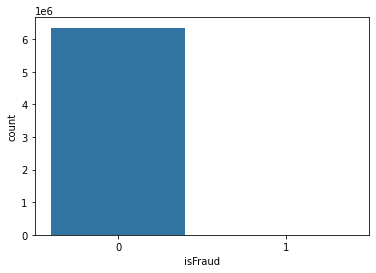

In [6]:
# Your response here
sns.countplot(fraud_detection["isFraud"])

### Clean the dataset. How are you going to integrate the time variable? Do you think the step (integer) coding in which it is given is appropriate?

In [7]:
# Your code here
isfraud = fraud_detection.loc[fraud_detection["isFraud"]==1]
isnotfraud = fraud_detection.loc[fraud_detection["isFraud"]==0].sample(n=len(isfraud))
fraud_balanced = pd.concat([isfraud,isnotfraud])

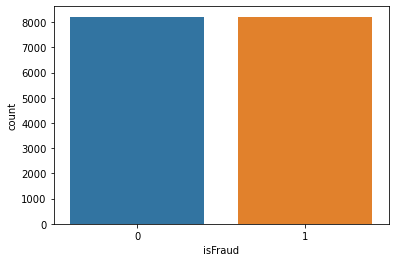

In [8]:
sns.countplot(fraud_balanced.isFraud)

In [9]:
fraud_balanced.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.148318,0.081089,-0.015861,-0.005833,0.028313,0.325563,0.037476
amount,0.148318,1.000000,0.637561,0.121805,0.032560,0.295434,0.339404,0.066577
oldbalanceOrg,0.081089,0.637561,1.000000,0.822818,0.012184,0.122868,0.124891,0.063312
newbalanceOrig,-0.015861,0.121805,0.822818,1.000000,0.044580,0.009153,-0.134905,0.091353
oldbalanceDest,-0.005833,0.032560,0.012184,0.044580,1.000000,0.923547,-0.082196,-0.007606
newbalanceDest,0.028313,0.295434,0.122868,0.009153,0.923547,1.000000,0.007653,-0.010243
isFraud,0.325563,0.339404,0.124891,-0.134905,-0.082196,0.007653,1.000000,0.031225
isFlaggedFraud,0.037476,0.066577,0.063312,0.091353,-0.007606,-0.010243,0.031225,1.000000


In [10]:
fraud_balanced.drop(["nameOrig","nameDest"], axis=1, inplace=True)

In [11]:
fraud_balanced

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,181.0,0.00,0.00,0.00,1,0
3,1,CASH_OUT,181.00,181.0,0.00,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,2806.0,0.00,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,2806.0,0.00,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,20128.0,0.00,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...
2498268,204,CASH_IN,56461.50,91674.5,148135.99,546698.46,490236.96,0,0
6159423,548,CASH_IN,94371.57,88330.0,182701.57,48987.94,0.00,0,0
4776136,335,PAYMENT,12798.33,0.0,0.00,0.00,0.00,0,0
95850,10,CASH_IN,98122.12,20301.0,118423.12,854081.54,963157.00,0,0


In [12]:
fraud_balanced["type"].value_counts()

CASH_OUT    6940
TRANSFER    4730
PAYMENT     2833
CASH_IN     1864
DEBIT         59
Name: type, dtype: int64

In [13]:
fraud_balanced_dummies = pd.get_dummies(fraud_balanced)
fraud_balanced_dummies

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
2,1,181.00,181.0,0.00,0.00,0.00,1,0,0,0,0,0,1
3,1,181.00,181.0,0.00,21182.00,0.00,1,0,0,1,0,0,0
251,1,2806.00,2806.0,0.00,0.00,0.00,1,0,0,0,0,0,1
252,1,2806.00,2806.0,0.00,26202.00,0.00,1,0,0,1,0,0,0
680,1,20128.00,20128.0,0.00,0.00,0.00,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2498268,204,56461.50,91674.5,148135.99,546698.46,490236.96,0,0,1,0,0,0,0
6159423,548,94371.57,88330.0,182701.57,48987.94,0.00,0,0,1,0,0,0,0
4776136,335,12798.33,0.0,0.00,0.00,0.00,0,0,0,0,0,1,0
95850,10,98122.12,20301.0,118423.12,854081.54,963157.00,0,0,1,0,0,0,0


In [14]:
fraud_balanced_dummies.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
step,1.000000,0.148318,0.081089,-0.015861,-0.005833,0.028313,0.325563,0.037476,-0.111715,0.047697,-0.021193,-0.147929,0.152440
amount,0.148318,1.000000,0.637561,0.121805,0.032560,0.295434,0.339404,0.066577,-0.123956,0.049143,-0.026000,-0.195711,0.199939
oldbalanceOrg,0.081089,0.637561,1.000000,0.822818,0.012184,0.122868,0.124891,0.063312,0.250122,-0.096345,-0.021463,-0.165106,0.070485
newbalanceOrig,-0.015861,0.121805,0.822818,1.000000,0.044580,0.009153,-0.134905,0.091353,0.452652,-0.179170,-0.010769,-0.084816,-0.049428
oldbalanceDest,-0.005833,0.032560,0.012184,0.044580,1.000000,0.923547,-0.082196,-0.007606,0.069549,0.117060,0.013293,-0.111196,-0.085397
newbalanceDest,0.028313,0.295434,0.122868,0.009153,0.923547,1.000000,0.007653,-0.010243,0.009821,0.219930,0.005347,-0.149759,-0.122553
isFraud,0.325563,0.339404,0.124891,-0.134905,-0.082196,0.007653,1.000000,0.031225,-0.357777,0.159236,-0.060040,-0.456526,0.465724
isFlaggedFraud,0.037476,0.066577,0.063312,0.091353,-0.007606,-0.010243,0.031225,1.000000,-0.011172,-0.026708,-0.001875,-0.014255,0.049101
type_CASH_IN,-0.111715,-0.123956,0.250122,0.452652,0.069549,0.009821,-0.357777,-0.011172,1.000000,-0.306021,-0.021481,-0.163335,-0.227522
type_CASH_OUT,0.047697,0.049143,-0.096345,-0.179170,0.117060,0.219930,0.159236,-0.026708,-0.306021,1.000000,-0.051355,-0.390485,-0.543939


### Run a logisitc regression classifier and evaluate its accuracy.

In [15]:
# Your code here
from sklearn.model_selection import train_test_split

X = fraud_balanced_dummies.drop(["isFraud"], axis=1)
y = fraud_balanced_dummies["isFraud"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [16]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression().fit(X_train, y_train)

In [23]:
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

y_lr_train_pred = model_lr.predict(X_train) 
y_lr_test_pred = model_lr.predict(X_test)

r2_lr_train = r2_score(y_train, y_lr_train_pred)
cm_lr_train = confusion_matrix(y_train, y_lr_train_pred)
acc_lr_train = accuracy_score(y_train, y_lr_train_pred)
f1_score_train = f1_score(y_train, y_lr_train_pred)

r2_lr_test = r2_score(y_test, y_lr_test_pred)
cm_lr_test = confusion_matrix(y_test, y_lr_test_pred)
acc_lr_test = accuracy_score(y_test, y_lr_test_pred)
f1_score_test = f1_score(y_test, y_lr_test_pred)

print("r2 score:", r2_lr_train)
print("Confusion matrix:\n", cm_lr_train)
print("Accuracy score:", acc_lr_train)
print("F1 score:", f1_score_train)

print("r2 score:",r2_lr_test)
print("Confusion matrix:\n",cm_lr_test)
print("Accuracy score:",acc_lr_test)
print("F1 score:", f1_score_test)

r2 score: 0.6015220330891102
Confusion matrix:
 [[5946  622]
 [ 687 5885]]
Accuracy score: 0.9003805175038052
F1 score: 0.8999158957106813
r2 score: 0.6068162159258663
Confusion matrix:
 [[1491  154]
 [ 169 1472]]
Accuracy score: 0.9017041996348144
F1 score: 0.901132537496174


### Now pick a model of your choice and evaluate its accuracy.

In [18]:
# Your code here
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors = 3).fit(X_train, y_train)

In [19]:
y_knn_train_pred = model_knn.predict(X_train) 
y_knn_test_pred = model_knn.predict(X_test)

r2_knn_train = r2_score(y_train, y_knn_train_pred)
cm_knn_train = confusion_matrix(y_train, y_knn_train_pred)
acc_knn_train = accuracy_score(y_train, y_knn_train_pred)

r2_knn_test = r2_score(y_test, y_knn_test_pred)
cm_knn_test = confusion_matrix(y_test, y_knn_test_pred)
acc_knn_test = accuracy_score(y_test, y_knn_test_pred)

print("r2 score:",r2_knn_train)
print("Confusion matrix:\n",cm_knn_train)
print("Accuracy score:",acc_knn_train)

print("r2 score:",r2_knn_test)
print("Confusion matrix:\n",cm_knn_test)
print("Accuracy score:",acc_knn_test)

r2 score: 0.9062404783739083
Confusion matrix:
 [[6368  200]
 [ 108 6464]]
Accuracy score: 0.9765601217656013
r2 score: 0.8222760604494628
Confusion matrix:
 [[1560   85]
 [  61 1580]]
Accuracy score: 0.9555690809494827


In [20]:
from sklearn.linear_model import LinearRegression
model_linear = LinearRegression().fit(X_train, y_train)

In [21]:
y_lin_train_pred = model_linear.predict(X_train) 
y_lin_test_pred = model_linear.predict(X_test)

r2_lin_train = r2_score(y_train, y_lin_train_pred)
r2_lin_train

0.56183086445257

### Which model worked better and how do you know?

In [22]:
# Your response here
# Knn worked better, as it has less false negatives and false positives and it has a greater accuracy score.

### Note: before doing the first commit, make sure you don't include the large csv file, either by adding it to .gitignore, or by deleting it.